In [20]:
import pykat

import pykat
print('Loading Pykat from: '+pykat.__file__)
print('Pykat version: '+pykat.__version__)
print('Using finesse from: '+str(pykat.kat._finesse_exec()))
print('Finesse version: '+str(pykat.v))

from pykat import finesse
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

Loading Pykat from: /Users/zhangteng/miniconda3/lib/python3.7/site-packages/pykat/__init__.py
Pykat version: 1.1.331
Using finesse from: /Users/zhangteng/Documents/kat-2-2/kat
Finesse version: 2.2-11-ga945eda


## Quick Checks
Quick check that changing xbeta on a bs before a cavity excited the first order mode.

In [28]:
# Finesse Solution
bhd = finesse.kat()
bhd.load('BHD_finesse_BHD_aLIGOstyle.kat')

Parsing `set A1 pdA1 re` into pykat object not implemented yet, added as extra line.
Parsing `set A2 pdA2 re` into pykat object not implemented yet, added as extra line.
Parsing `set B1 pdB1 re` into pykat object not implemented yet, added as extra line.
Parsing `set B2 pdB2 re` into pykat object not implemented yet, added as extra line.
Parsing `set qA1 snA1 re` into pykat object not implemented yet, added as extra line.
Parsing `set qA2 snA2 re` into pykat object not implemented yet, added as extra line.
Parsing `set qB1 snB1 re` into pykat object not implemented yet, added as extra line.
Parsing `set qB2 snB2 re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:30:34.778802

Finished in 1.51118 seconds


100% | ETA:  0:00:00 | Saving data                                             

Text(0.5, 0, 'Freq [Hz]')

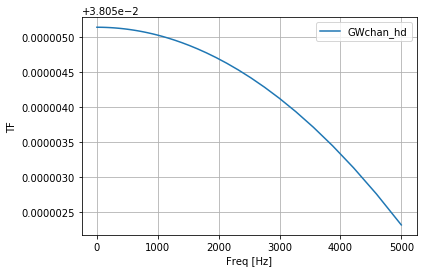

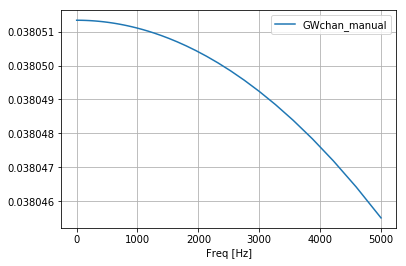

In [36]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
cav cavOMC OMC1_IC nOMC1_ICc OMC1_IC nOMC1_ICd
fsig sig1 SM1 phase 1 0 
hd hd1 180 nAS1 nAS2
xaxis sig1 f log 1 5k 100
maxtem off
""")
bhd2.AS.P = 1e-3
bhd2.LO.P = 100e-3

bhd2.SM1.phi=np.sqrt(2)*45

out = bhd2.run()

fig, ax = plt.subplots(nrows=1,sharex=True)
ax.plot(out.x,np.abs(out['hd1']),label='GWchan_hd')
ax.legend()
ax.grid()
ax.set_xlabel('Freq [Hz]')
ax.set_ylabel('TF')

fig, ax = plt.subplots(nrows=1,sharex=True)
ax.plot(out.x,np.abs(out['GWchan']),label='GWchan_manual')


ax.legend()
ax.grid()
ax.set_xlabel('Freq [Hz]')

--------------------------------------------------------------
Running kat - Started at 2019-08-30 13:32:00.298358

Finished in 1.66842 seconds


100% | ETA:  0:00:00 | Saving data                                             

Text(0, 0.5, 'LO amp TF')

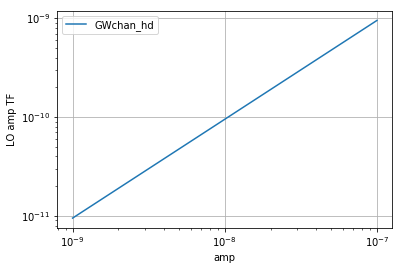

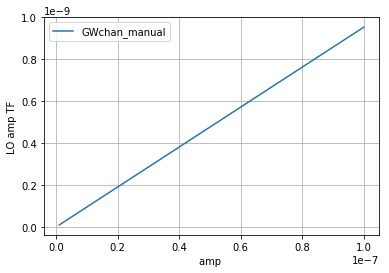

In [39]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
cav cavOMC OMC1_IC nOMC1_ICc OMC1_IC nOMC1_ICd
fsig sig1 LO amp 1 0
hd hd1 180 nAS1 nAS2
xaxis sig1 amp log 1E-9 1E-7 100
maxtem off
""")
bhd2.AS.P = 1e-3
bhd2.LO.P = 100e-3

bhd2.SM1.phi=0


out = bhd2.run()

fig, ax = plt.subplots(nrows=1,sharex=True)
ax.loglog(out.x,np.abs(out['hd1']),label='GWchan_hd')
ax.legend()
ax.grid()
ax.set_xlabel('amp')
ax.set_ylabel('LO amp TF')

fig, ax = plt.subplots(nrows=1,sharex=True)
ax.plot(out.x,np.abs(out['GWchan']),label='GWchan_manual')



ax.legend()
ax.grid()
ax.set_xlabel('amp ')
ax.set_ylabel('LO amp TF')

In [91]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
maxtem 3
cav cavOMC OMC1_IC nOMC1_ICc OMC1_IC nOMC1_ICd
attr SM1 xbeta 1u
fsig sig1 SM1 xbeta 1 0
hd hd1 180 nAS1 nAS2
#xaxis sig1 f log 1 5k 100
xaxis sig1 amp lin 0.001u 0.1u 100
""")

bhd2.AS.P = 0e-3
bhd2.LO.P = 10000e-3

bhd2.SM2.phi=np.sqrt(2)*45
out = bhd2.run()
GWchan_1=abs(out['GWchan'])

bhd2.AS.P = 1e-3
out = bhd2.run()
GWchan_2=abs(out['GWchan'])

bhd2.AS.P = 10e-3
out = bhd2.run()
GWchan_3=abs(out['GWchan'])

bhd2.AS.P = 100e-3
out = bhd2.run()
GWchan_4=abs(out['GWchan'])

--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:19:39.636001


100% | ETA:  0:00:00 | Saving data                                             


Finished in 17.7556 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:19:57.392417


100% | ETA:  0:00:00 | Saving data                                             


Finished in 19.3213 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:20:16.714468


100% | ETA:  0:00:00 | Saving data                                             


Finished in 17.2321 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:20:33.947153


100% | ETA:  0:00:00 | Saving data                                             


Finished in 16.8342 seconds


In [98]:
bhd2 = deepcopy(bhd)
bhd2.parse("""
maxtem 3
cav cavOMC OMC1_IC nOMC1_ICc OMC1_IC nOMC1_ICd
attr SM1 xbeta 1u
fsig sig1 SM1 xbeta 1 0
hd hd1 180 nAS1 nAS2
xaxis sig1 amp lin 0.001u 0.1u 100

""")
bhd2.AS.P = 0e-3
bhd2.LO.P = 10000e-3

bhd2.SM2.phi=0
out = bhd2.run()
AMP_GWchan_1=abs(out['GWchan'])

bhd2.AS.P = 1e-3
out = bhd2.run()
AMP_GWchan_2=abs(out['GWchan'])

bhd2.AS.P = 10e-3
out = bhd2.run()
AMP_GWchan_3=abs(out['GWchan'])


bhd2.AS.P = 100e-3
out = bhd2.run()
AMP_GWchan_4=abs(out['GWchan'])


--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:23:20.435792


100% | ETA:  0:00:00 | Saving data                                             


Finished in 18.4092 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:23:38.845658


100% | ETA:  0:00:00 | Saving data                                             


Finished in 16.5517 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:23:55.397941


100% | ETA:  0:00:00 | Saving data                                             


Finished in 18.4555 seconds
--------------------------------------------------------------
Running kat - Started at 2019-08-30 14:24:13.854245


100% | ETA:  0:00:00 | Saving data                                             


Finished in 15.5552 seconds


Text(0.5, 0, 'Amp [rad]')

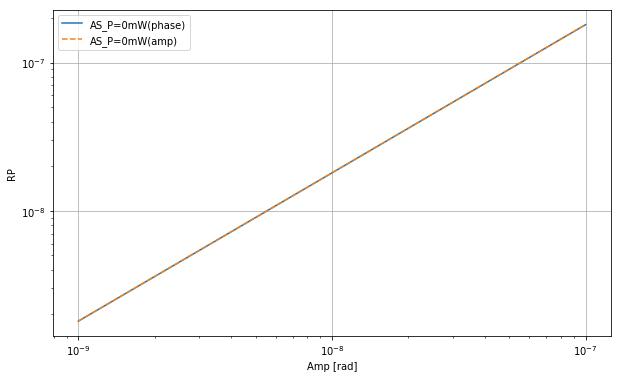

In [104]:
fig, ax = plt.subplots(nrows=1,sharex=True,figsize=(10,6))
ax.loglog(out.x,np.abs(GWchan_1),out.x,np.abs(AMP_GWchan_1),'--')
#ax.plot(out.x,np.abs(out['LOchan']),'--',label='LOchan')
ax.legend(['AS_P=0mW(phase)','AS_P=0mW(amp)'])

ax.grid()
ax.set_ylabel('RP')
ax.set_xlabel('Amp [rad]')

Text(0.5, 0, 'Amp [rad]')

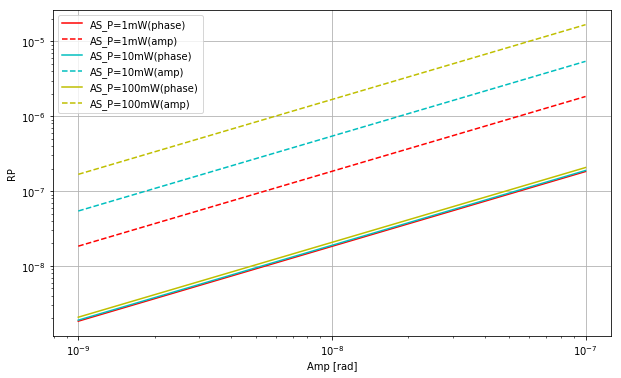

In [105]:
fig, ax = plt.subplots(nrows=1,sharex=True,figsize=(10,6))
ax.loglog(out.x,np.abs(GWchan_2),'r',out.x,np.abs(AMP_GWchan_2),'r--',
          out.x,np.abs(GWchan_3),'c',out.x,np.abs(AMP_GWchan_3),'c--',
          out.x,np.abs(GWchan_4),'y',out.x,np.abs(AMP_GWchan_4),'y--')

ax.legend(['AS_P=1mW(phase)','AS_P=1mW(amp)',
           'AS_P=10mW(phase)',
           'AS_P=10mW(amp)','AS_P=100mW(phase)','AS_P=100mW(amp)'])

ax.grid()
ax.set_ylabel('RP')
ax.set_xlabel('Amp [rad]')